# Ejercicio 6:

Explique cuál es diferencia entre localización de objetos y clasificación de imágenes.

Muestre ejemplos con imágenes propias de ello.

## Clasificación de imagenes:

Un modelo de clasificacion de imagenes toma una imagen como entrada y predice la clase/categoria a la que pertenece dicha imagen.



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
from IPython.display import display
import numpy as np

# Cargar el modelo preentrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

def classify_image(img_path):
    # Cargar y preparar la imagen
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Tamaño de entrada para EfficientNetB0

    # Convertir la imagen a un array y procesarla
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Realizar la predicción con el modelo
    predictions = model.predict(img_array)

    # Decodificar y retornar las predicciones
    return decode_predictions(predictions, top=3)[0]

### Ejemplos:

#### 1:

Si le pasamos por ejemplo como entrada una imagen que contiene una guitarra como la siguiente.

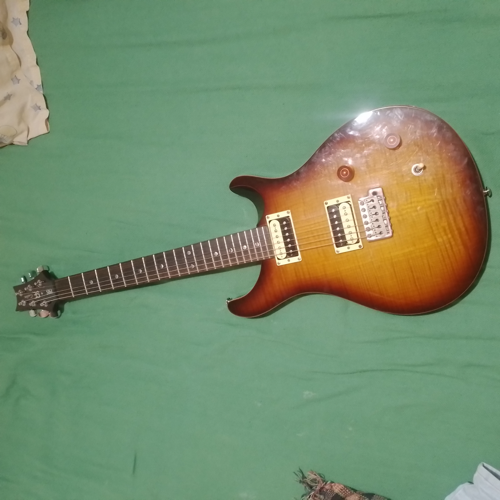

In [ ]:
img_path = 'guitarra.jpg'
img = Image.open(img_path).resize((500,500))
# Imprimir la imagen por pantalla
display(img)

In [ ]:
predictions = classify_image(img_path)

print('\n')

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 2s 2s/step


1: electric_guitar (0.77)
2: acoustic_guitar (0.12)
3: banjo (0.01)


La salida sera un vector de probabilidades de pertenencia a clases o categorias o lo que es lo mismo la probabilidad de que nuestro objeto de la foto sea el objeto que indica el nombre de la clase.

En este caso la imagen de nuestra foto muestra una guitarra electrica, y la mayor probabilidad 0.77 la tiene la clase electric_guitar, por lo que podemos decir que clasifico bien en este caso.

#### 2:

Al igual que el ejemplo anterior le pasamos como entrada una foto cuyo objeto en primer plano son unos lentes de sol.

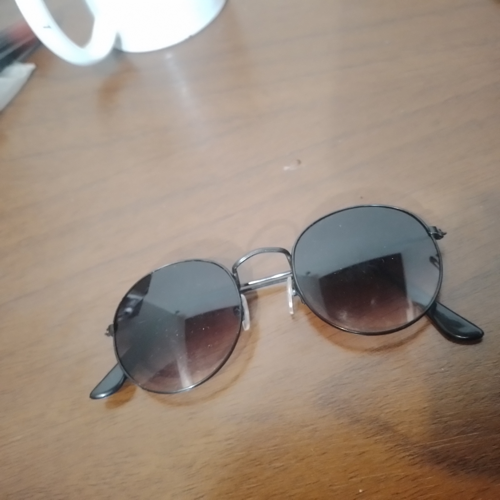

In [ ]:
img_path = 'lentes.jpg'
img = Image.open(img_path).resize((500,500))
# Imprimir la imagen por pantalla
display(img)

In [ ]:
predictions = classify_image(img_path)

print('\n')

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 0s 79ms/step


1: sunglass (0.60)
2: sunglasses (0.31)
3: loupe (0.01)


La salida del modelo con 0.6 de probabilidad es sunglass lo que indica nuevamente que clasifico bien.

## Localizacion / Deteccion de objetos:

Consiste en detectar en una imagen multiples objetos, clasificarlos y determinar su posicion con un bounding box. Una diferencia con lo anterior es que la localizacion/deteccion de objetos es mas amplia y compleja que la clasificacion y la clasificacion esta incluida dentro de la deteccion de objetos.

### Ejemplo:

In [ ]:
%pip install ultralytics
# Librería mediapy para mostrar videos
%pip install -q mediapy
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)



0: 512x640 2 persons, 1 car, 1 chair, 317.3ms
Speed: 4.6ms preprocess, 317.3ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


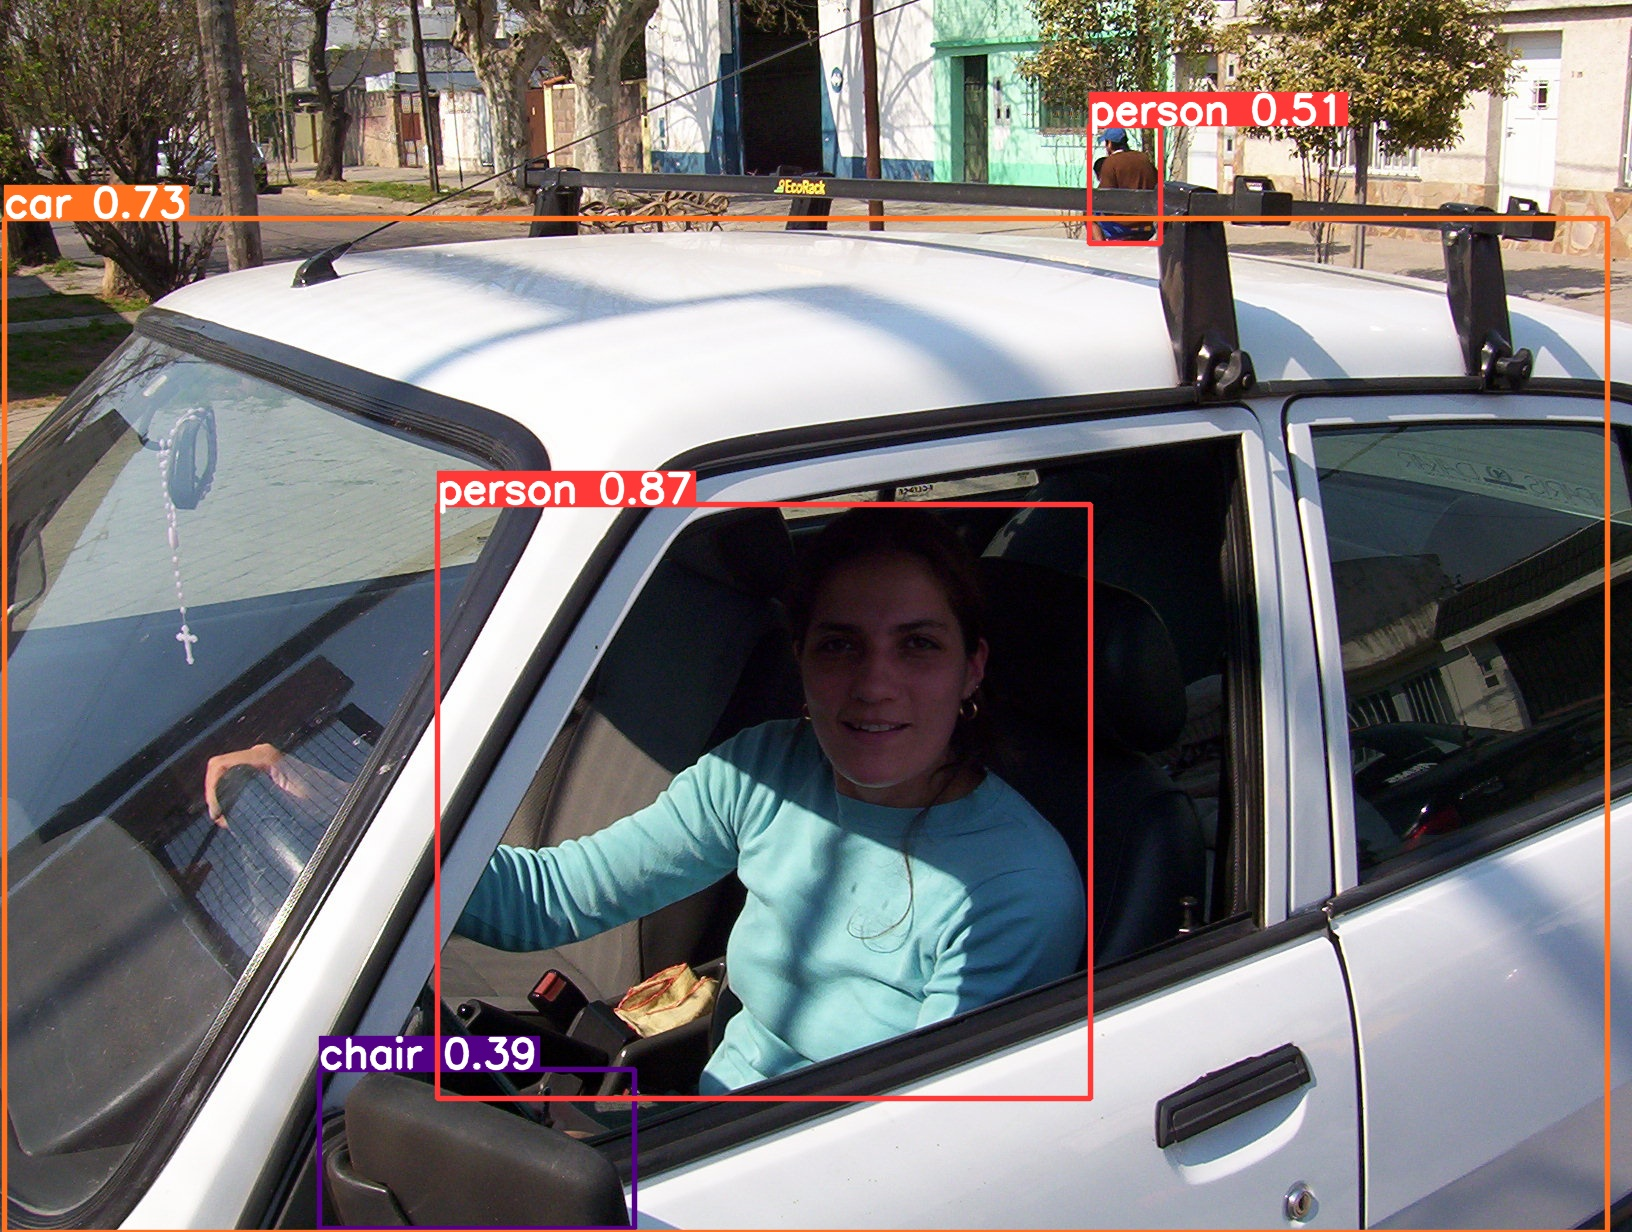

In [ ]:
# Importamos las librerías a utilizar
import cv2
from ultralytics import YOLO
from IPython.display import Image

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # This will automatically download the model weights

# Perform inference
source_img = cv2.imread('auto_persona.jpg')
results = model(source_img)

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Guardamos el resultado en JPG
cv2.imwrite('auto_persona_results.jpg', annotated_frame)

# Mostramos el resultado en Colab
Image('auto_persona_results.jpg')

En el ejemplo anterior se ve claro como la localizacion de objetos tiene por objetivo encontrar "multiples" objetos en una imagen, clasificar cada uno de ellos y marcar su posicion con un boundingbox.